# General Overview of Transaction

In [1]:
#Reading data from excel sheet using panda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

#To show graph inline
%matplotlib inline

#reading excel file, directing to first sheet.
data = pd.read_excel("data_science_analytics_2018_data.xlsx", sheet_name="data")

data.shape

(541909, 8)

There are 541,909 rows of transaction and 8 columns. It also can be seen that there are several negative number in quantity column. Hence, data filtering will be needed along with converting the InvoiceDate into proper datatype.

In [2]:
#reconfigure data types, filtering improper value

#reformating date datatype to date time.
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])

#Filtering negative quantity
data["Quantity"]=np.absolute(data["Quantity"])


Below is the total number of transaction for each country for the period of 2010 and 2011 altogether. The highest traffic occured in the United Kingdom, while the lowest was in Saudi Arabia.

In [3]:
data["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

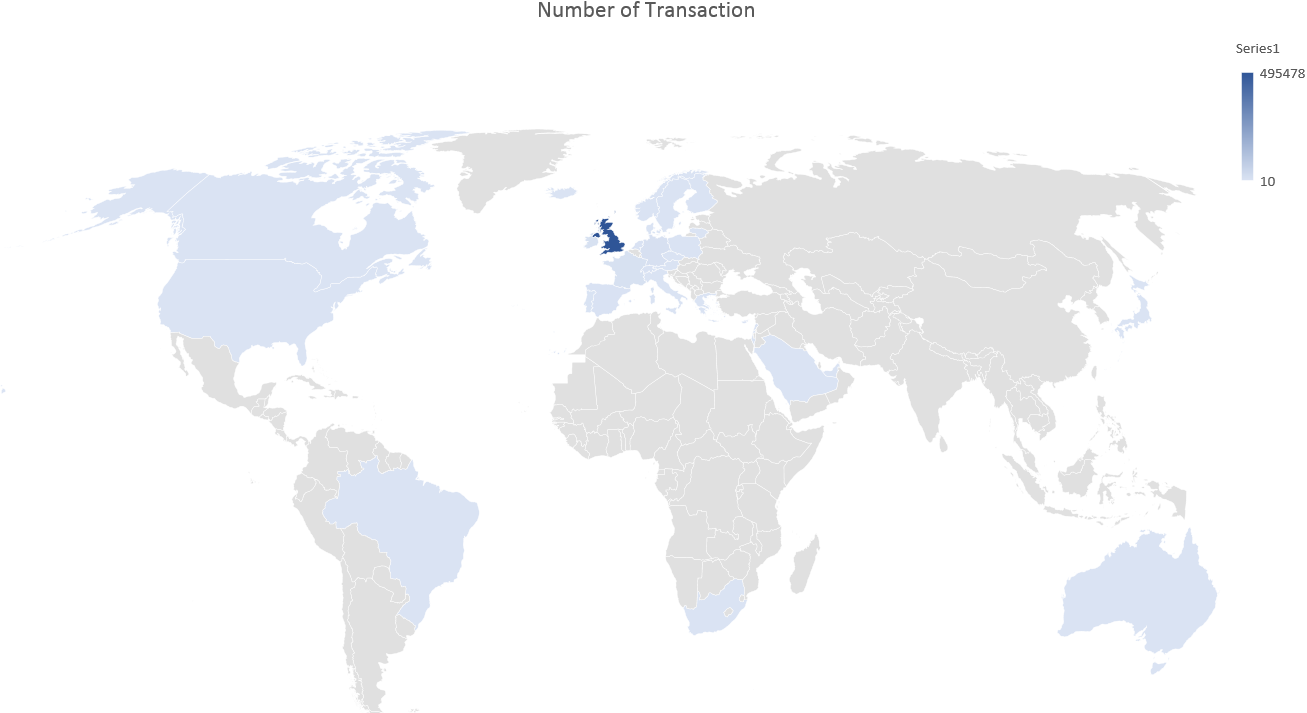

In [4]:
Image(filename="WorldMap1.png",width=1000,height=600)

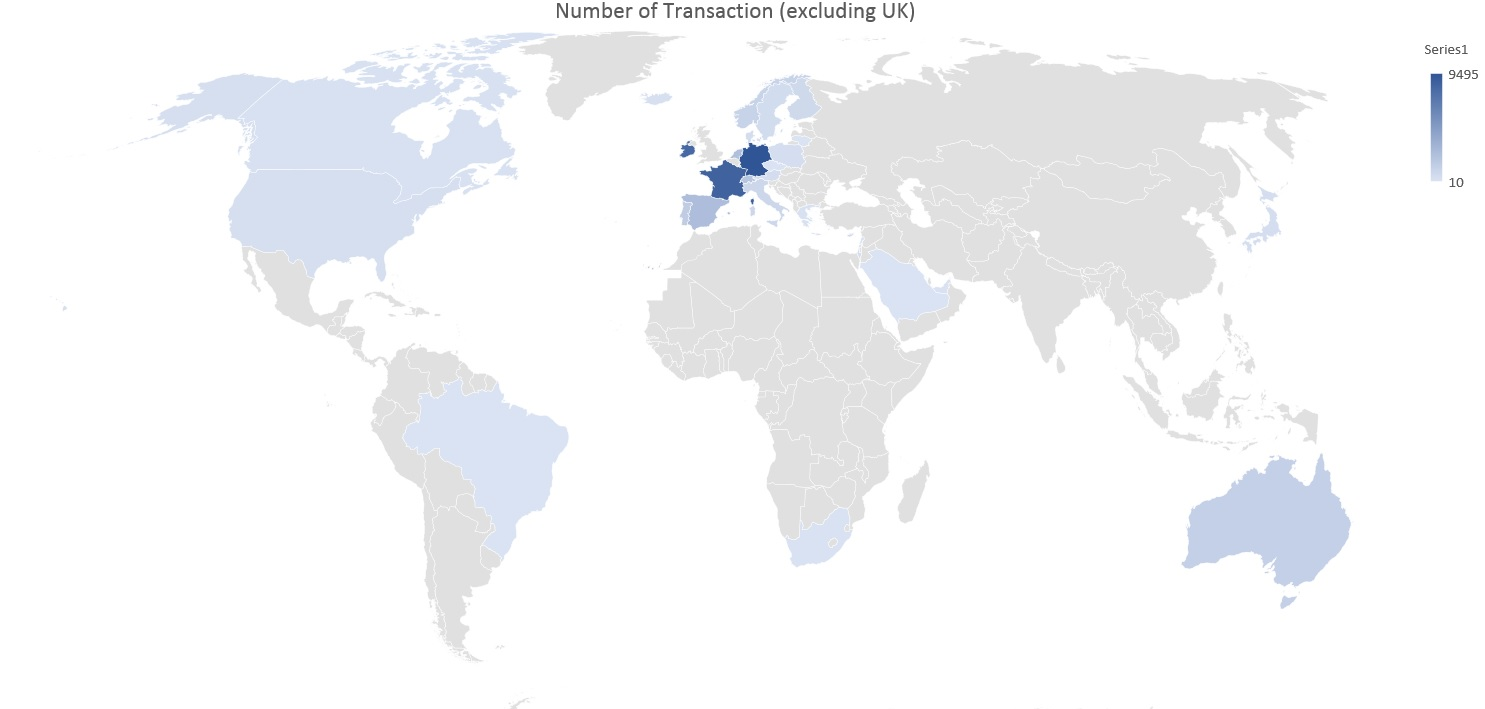

In [5]:
Image(filename="WorldMap2.jpg",width=1000,height=600)

Above is the two World Heat map of the number of transactions for each country; First image is including UK, whereas second image is not. The reason being is that the number of transaction for UK itself is extremely high as such that the other region is presented with light color. (Image is created using Microsoft Excel)

In [6]:
#Separating transaction based on the year.
#Transaction data for year 2010
data_2010=data[data["InvoiceDate"]<pd.Timestamp(2011,1,1)]


#Transaction data for year 2011
data_2011=data[data["InvoiceDate"]>pd.Timestamp(2011,1,1)]

Below is the number of transaction for each country in 2010 and 2011 and NaN represents not a number or empty cell. 
Therefore, from the table below, there are some countries that did not make any transaction in the year 2010.

In [7]:
compare = pd.DataFrame([data_2010["Country"].value_counts(),data_2011["Country"].value_counts()],index = [2010,2011]).T
compare

,2010,2011
Australia,35.0,1224.0
Austria,9.0,392.0
Bahrain,1.0,18.0
Belgium,95.0,1974.0
Brazil,NaN,32.0
Canada,NaN,151.0
Channel Islands,17.0,741.0
Cyprus,83.0,539.0
Czech Republic,NaN,30.0
Denmark,20.0,369.0


From the table above, we can see that some of countries start making transaction with the company in year 2011 such as Brazil, Canada, European Community, and so on, while only one country stop making transaction which is Lithuania.

Below are the Histogram for transaction for each country, and it can be seen that United Kingdom has the highest number of transaction in both 2010 and 2011.

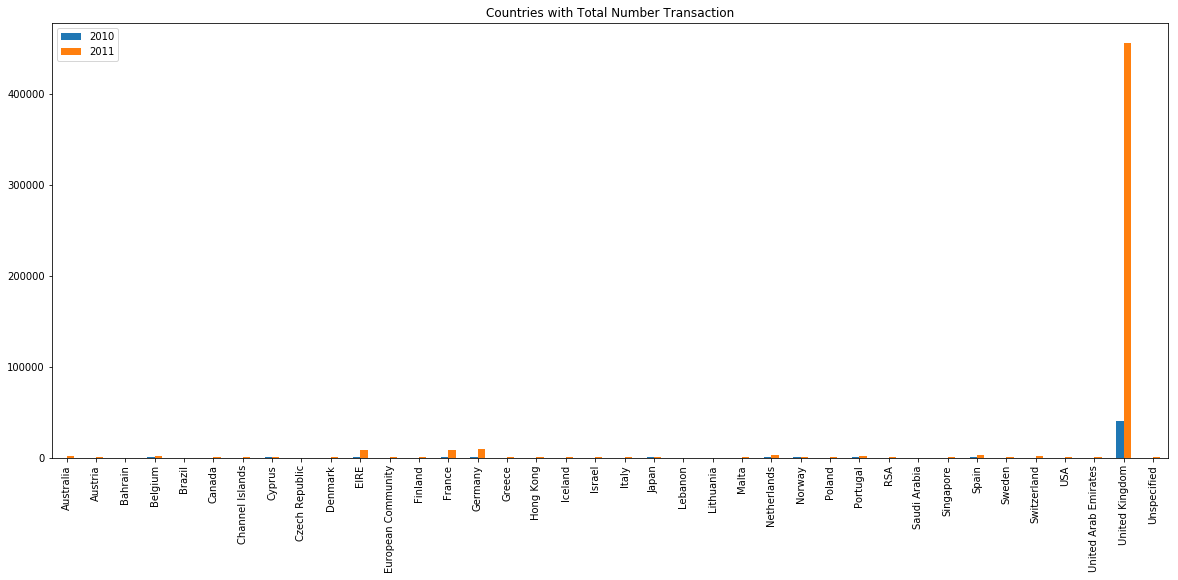

In [8]:
compare.plot(kind='bar',figsize=(20,8),title="Countries with Total Number Transaction")

Below is the histogram of the countries excluding the transaction from United Kingdoms. The next top three countries after United Kingdom in terms of number of transaction are EIRE, France, and Germany with more than 7000 transaction in comparison to other countries whose transaction is below 3000.

With this information, it can be said that the transaction mostly occured in the Northeastern part of Europe.

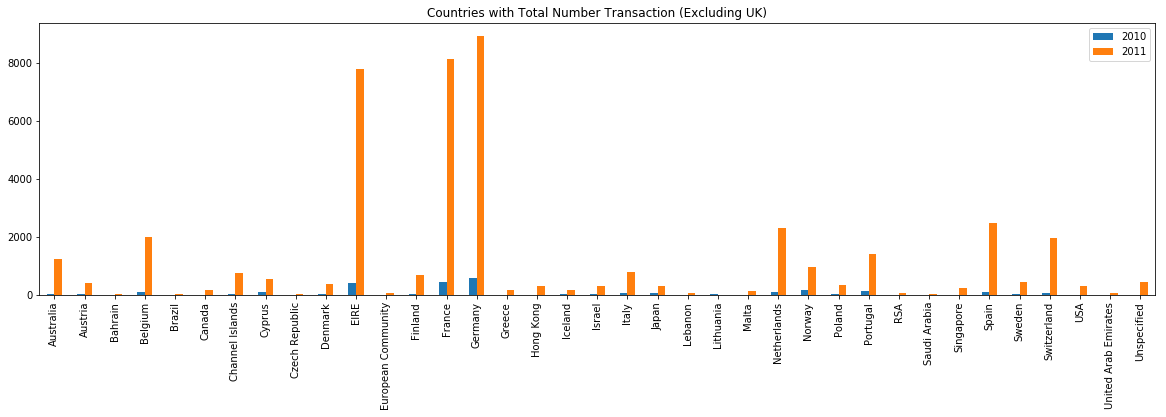

In [9]:
compare[compare.index!="United Kingdom"].plot(kind='bar',figsize=(20,5)\
                                              ,title="Countries with Total Number Transaction (Excluding UK)")

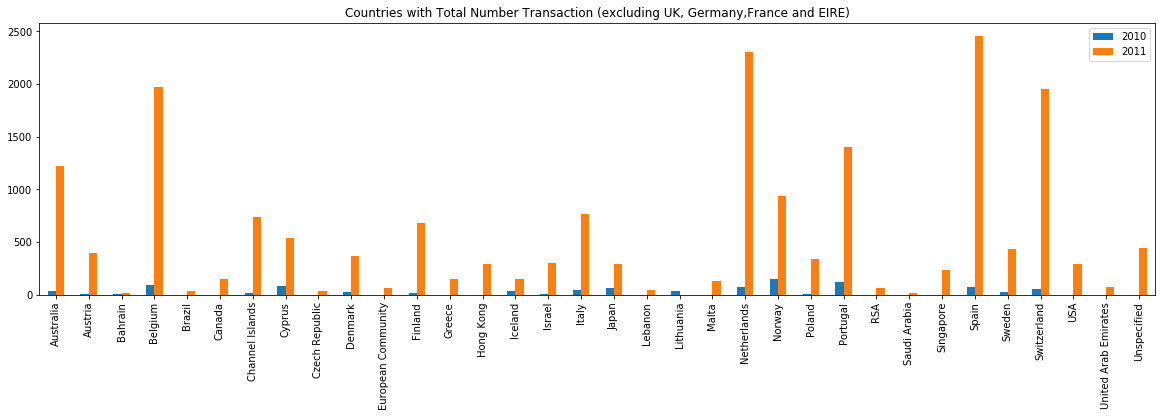

In [10]:
compare.loc[[name for name in compare.index if name not in ("United Kingdom","Germany","France","EIRE")]]\
.plot(kind='bar',figsize=(20,5),title="Countries with Total Number Transaction (excluding UK, Germany,France and EIRE)")

# Identifying Countries that start their transaction in 2011

In this section, we will be looking for countries who started their transaction with the company in 2011 and identify the time and number of transaction each month.

Below are the list of the countries who started their transaction with the company in 2011.

In [11]:
#Seperating countries who made transaction in 2011 but not in 2010
new_country=[name for name in compare.index if pd.isnull(compare[2010][name])]
new_country

['Brazil',
 'Canada',
 'Czech Republic',
 'European Community',
 'Greece',
 'Hong Kong',
 'Lebanon',
 'Malta',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'USA',
 'United Arab Emirates',
 'Unspecified']

In [12]:
new_2011 =pd.DataFrame()

#Creating dataset that contain countries that only did transaction in 2011
for country in new_country:
    new_2011=new_2011.append(data_2011[data_2011["Country"]==country])


In [13]:
#Storing country as the key, and list of products as value
product =[]
new_countries={}
for country in new_country:
    info  = new_2011["InvoiceDate"][new_2011["Country"]==country]
    for item in new_2011["Description"][new_2011["InvoiceDate"]==min(info)]:
        product.append(item)
    new_countries[min(info)]= country

In [14]:
for time in sorted(new_countries):
    print(new_countries[time], time, sep="\t")

Greece	2011-01-24 11:39:00
Hong Kong	2011-01-24 14:24:00
Singapore	2011-01-25 13:26:00
Lebanon	2011-01-27 10:19:00
United Arab Emirates	2011-02-14 12:46:00
Saudi Arabia	2011-02-24 10:34:00
Czech Republic	2011-02-28 08:43:00
Canada	2011-03-14 13:53:00
Unspecified	2011-04-11 13:29:00
Brazil	2011-04-15 10:25:00
USA	2011-04-19 16:19:00
European Community	2011-04-26 10:54:00
Malta	2011-06-08 08:31:00
RSA	2011-10-13 12:50:00


The information above shows the country along with the earlist date of transaction. It can be seen that the transaction slowly moving from the Middle Eastern to America island.

In [33]:
new_2011.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,1982.0,1982,1982,1982.000000,1982,1982.000000,1492.000000,1982
unique,85.0,1010,1019,NaN,85,NaN,NaN,14
top,570467.0,M,Manual,NaN,2011-10-10 16:06:00,NaN,NaN,Unspecified
freq,101.0,21,21,NaN,101,NaN,NaN,446
first,NaN,NaN,NaN,NaN,2011-01-24 11:39:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-08 10:14:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.085772,NaN,21.573461,13991.653485,NaN
std,NaN,NaN,NaN,19.426760,NaN,213.627092,1980.818757,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12363.000000,NaN
25%,NaN,NaN,NaN,4.000000,NaN,1.250000,12646.000000,NaN


For these countries, apparently the most item bought was not an exact item, "Manual", and it has 21 counts. Above are the table regarding to the statistical information for these countries.

# Looking Deep into UK Transaction

In [17]:
import datetime
UK_data_2010 = data_2010[data_2010["Country"]=="United Kingdom"]
UK_data_2011 = data_2011[data_2011["Country"]=="United Kingdom"]

Identifying the number of transaction each month.

In [18]:
UK_date_count_2010={}
for i in range(1,13):
    for info in UK_data_2010["InvoiceDate"]:
        if i == info.to_pydatetime().month:
            if i not in UK_date_count_2010:
                UK_date_count_2010[i]=1
            else:
                UK_date_count_2010[i]+=1


In [19]:
UK_date_count_2010=pd.Series(UK_date_count_2010)
UK_date_count_2010

12    40125
dtype: int64

Above is the information in regards to number of transaction for year 2010 for UK.

In [20]:
UK_date_count_2011={}
for i in range(1,13):
    for info in UK_data_2011["InvoiceDate"]:
        if i == info.to_pydatetime().month:
            if i not in UK_date_count_2011:
                UK_date_count_2011[i]=1
            else:
                UK_date_count_2011[i]+=1

In [21]:
UK_date_count_2011 =pd.Series(UK_date_count_2011)
UK_date_count_2011

1     31900
2     25368
3     33483
4     28038
5     33672
6     33173
7     35964
8     31135
9     45533
10    54521
11    78640
12    23926
dtype: int64

Above is the information in regards to number of transaction for year 2010 for UK.

Comparing both year, apparently in year 2010 transaction only occured at the end of the year, whereas in year 2011 transaction occured throughout the year. Below is the graph showing the number of transaction throughout the year for UK in 2011.
It can be concluded that the highest peak is on the eleventh month, November, and the lowest peak is on the end of the month. 

In [22]:
#kind='bar', title="Number of Transaction in 2011 for UK"
new_days_2010 = UK_data_2010["InvoiceDate"]

new_days_list=[]

for item in new_days_2010:
    daxe,time = str(item).split(" ")
    year,month,day = daxe.split("-")
    new_days_list.append(datetime.datetime(int(year),int(month),int(day)).strftime('%w'))

new_days_2010=pd.Series(new_days_list)


In [23]:
new_days_2011 = UK_data_2011["InvoiceDate"]

new_days_list=[]

for item in new_days_2011:
    daxe,time = str(item).split(" ")
    year,month,day = daxe.split("-")
    new_days_list.append(datetime.datetime(int(year),int(month),int(day)).strftime('%w'))

new_days_2011=pd.Series(new_days_list)
#new_days_2011=new_days_list.rename(columns={0:"Days"})


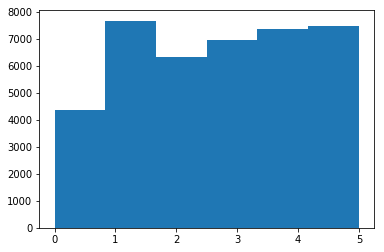

In [24]:
new_days_2010.hist(bins=6,grid=False)


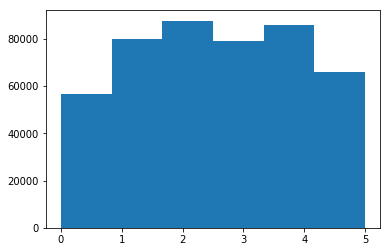

In [25]:
new_days_2011.hist(bins=6,grid=False)

The two histograms above are displaying the total number of purchase based on days, where 0 indicates Sunday and 6 indicates Saturday. Also, it can be concluded that transaction did not occured on Saturday for both 2010 and 2011 in UK. 

# Sales Information 

In this section we will be looking into the total sales made by each countries and analyze the information.

In [26]:
#Creating new column "Sales" to calculate each sales transaction
data_sales_2010 = data_2010
data_sales_2010["Sales"]=data_sales_2010["Quantity"]*data_sales_2010["UnitPrice"]

data_sales_2011 = data_2011
data_sales_2011["Sales"]=data_sales_2011["Quantity"]*data_sales_2011["UnitPrice"]

C:\Users\Kelvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kelvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
#calculating total sales based on country
sales_2010={}
for country in set(data_sales_2010["Country"]):
    sales_2010[country]=sum(data_sales_2010[data_sales_2010["Country"]==country]["Sales"])

sales_2011={}
for country in set(data_sales_2011["Country"]):
    sales_2011[country]=sum(data_sales_2011[data_sales_2011["Country"]==country]["Sales"])

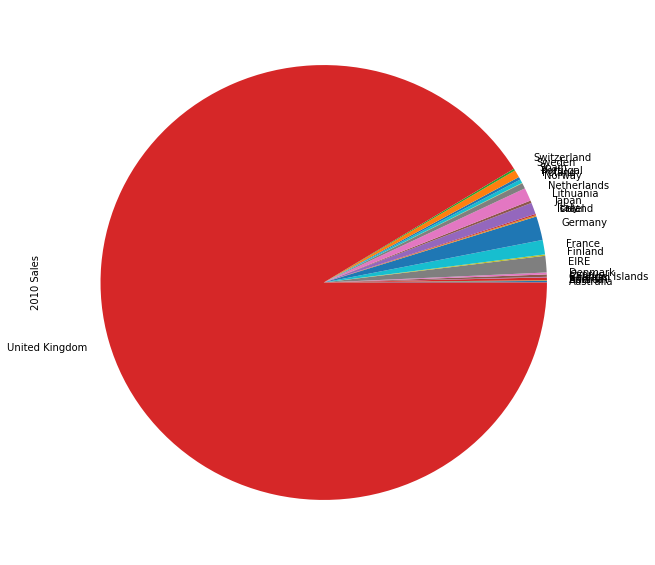

In [28]:
pd.Series(sales_2010,name="2010 Sales").plot(kind="pie",figsize=(10,10))

Pie chart above is the total revenue for each country in 2010. It can be seen that UK responsible for almost 90% of the total revenue for 2010.

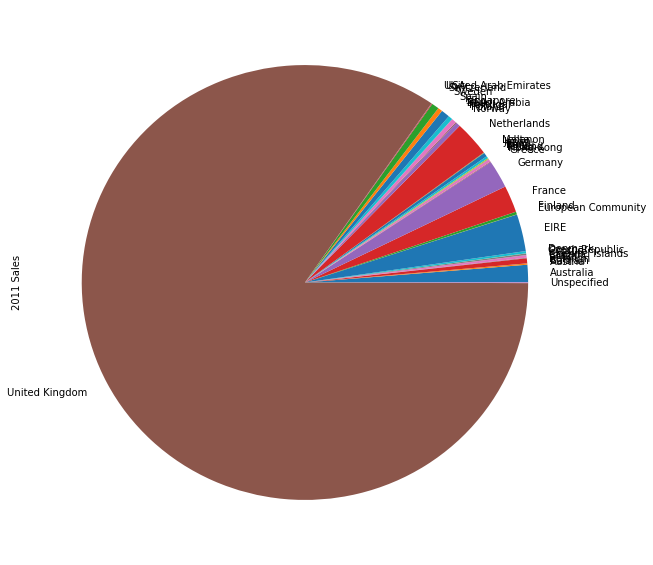

In [29]:
pd.Series(sales_2011,name="2011 Sales").plot(kind="pie",figsize=(10,10))

Pie chart above is the total revenue for each country in 2011. It can be seen that UK had lost some of the percentage down to roughly 80% in 2011.

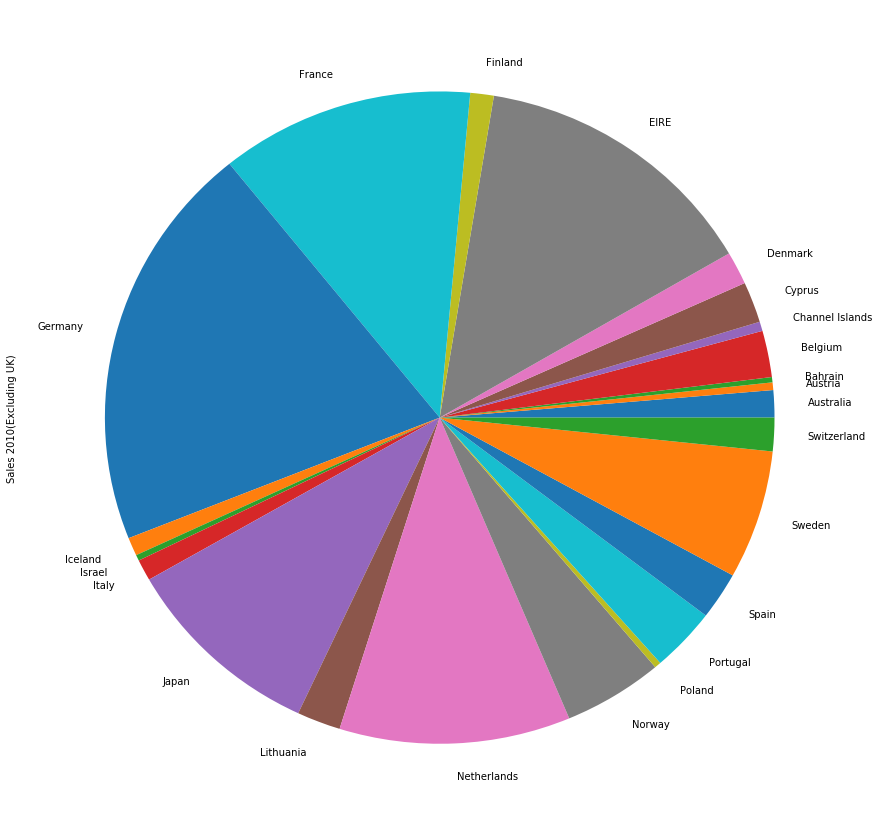

In [30]:
del sales_2010["United Kingdom"]
pd.Series(sales_2010,name="Sales 2010(Excluding UK)").plot(kind="pie",figsize=(15,15))

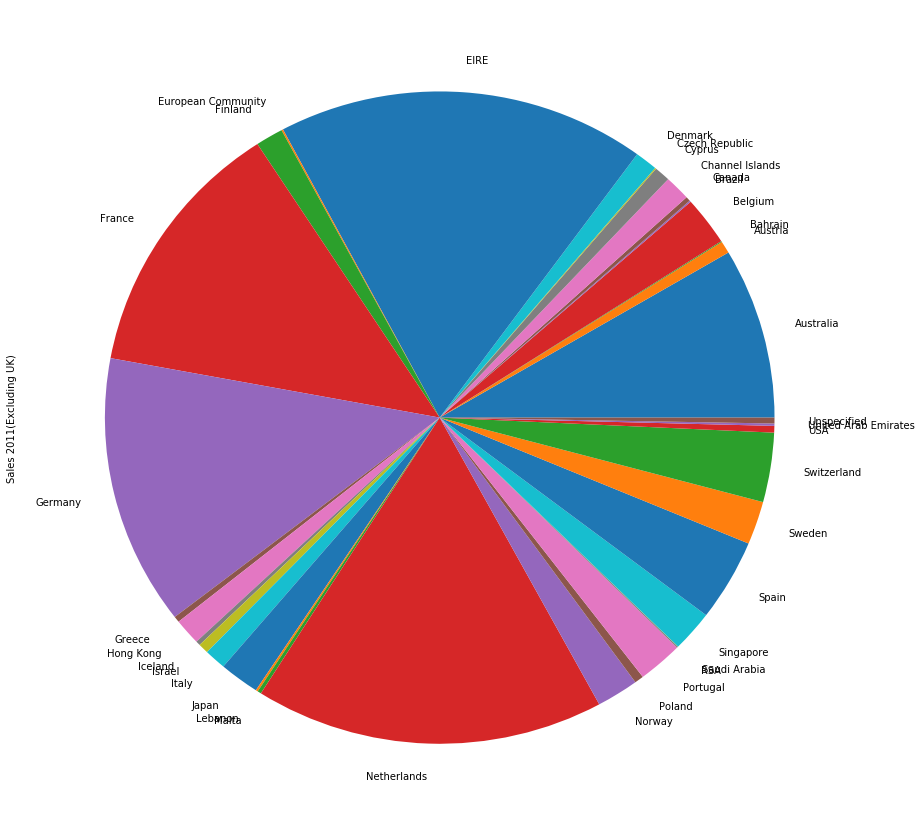

In [31]:
del sales_2011["United Kingdom"]
pd.Series(sales_2011,name="Sales 2011(Excluding UK)").plot(kind="pie",figsize=(15,15))

The first two pie charts above shows the total sales for each country for year 2010 and 2011 repectively. Since United Kingdom had the highest sales for both years, the next two pie charts display information of other countries excluding United Kingdom.

From the last two pie charts, we can see that some countries maintain the same percentage level for both years. They are Germany, France, EIRE, and Netherlands. However, we also can see that some countries with sales dropped in 2011 such as Japan, Sweden, and Norway, whereas there are also countries with sales increased such as Australia, Switzerland, and Spain.